In [3]:
# Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
# Loading Training Data
train_df = pd.read_csv("../data/raw/train.csv")
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,21740,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,0
1,22648,32,technician,single,secondary,no,116,yes,no,cellular,20,aug,718,2,-1,0,unknown,1
2,31793,56,housemaid,married,primary,no,82,no,no,unknown,16,may,215,1,-1,0,unknown,0
3,21439,25,services,single,secondary,no,333,no,yes,cellular,15,jul,1056,2,-1,0,unknown,1
4,70323,38,services,married,secondary,no,393,no,no,unknown,18,jun,90,3,-1,0,unknown,0


In [7]:
# Loading Testing Data
test_df = pd.read_csv("../data/raw/test.csv")
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,81531,42,blue-collar,married,primary,no,636,yes,no,cellular,20,apr,91,2,-1,0,unknown
1,17063,37,self-employed,divorced,secondary,no,-38,yes,no,cellular,12,may,165,1,175,2,failure
2,8708,34,services,married,secondary,no,-694,yes,no,unknown,26,may,62,1,-1,0,unknown
3,76385,32,blue-collar,married,primary,no,209,yes,yes,unknown,20,jun,8,31,-1,0,unknown
4,958,27,management,single,tertiary,no,-98,yes,yes,unknown,16,may,344,2,-1,0,unknown


In [8]:
print(f"Training Data Shape: {train_df.shape}")
print(f"Testing Data Shape: {test_df.shape}")

Training Data Shape: (31647, 18)
Testing Data Shape: (9042, 17)


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31647 non-null  int64 
 1   age        31647 non-null  int64 
 2   job        31647 non-null  object
 3   marital    31647 non-null  object
 4   education  31647 non-null  object
 5   default    31647 non-null  object
 6   balance    31647 non-null  int64 
 7   housing    31647 non-null  object
 8   loan       31647 non-null  object
 9   contact    31647 non-null  object
 10  day        31647 non-null  int64 
 11  month      31647 non-null  object
 12  duration   31647 non-null  int64 
 13  campaign   31647 non-null  int64 
 14  pdays      31647 non-null  int64 
 15  previous   31647 non-null  int64 
 16  poutcome   31647 non-null  object
 17  Target     31647 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 4.3+ MB


In [10]:
# Checking Statistical summary
train_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,Target
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,50089.981452,40.938509,1366.769267,15.813884,260.069517,2.758777,40.669732,0.576927,0.118400
std,28796.401090,10.619933,3105.739729,8.312928,259.175306,3.084828,100.961218,1.947053,0.323086
min,1.000000,18.000000,-4057.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,25064.000000,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,50203.000000,39.000000,451.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,0.000000
75%,74947.500000,48.000000,1414.000000,21.000000,322.000000,3.000000,-1.000000,0.000000,0.000000
max,99997.000000,95.000000,98417.000000,31.000000,4918.000000,63.000000,871.000000,58.000000,1.000000


In [11]:
train_df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,poutcome
count,31647,31647,31647,31647,31647,31647,31647,31647,31647
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,6760,19075,16181,31058,17541,26597,20555,9680,25849


In [12]:
# Checking missing values
train_df.isnull().sum().sum()

np.int64(0)

In [14]:
# Checking for duplicates
train_df.duplicated().sum()

np.int64(0)

In [21]:
# Checking unique values for each column
for col in train_df.select_dtypes(include="object").columns:
    print(f"Column: {col}:  {train_df[col].unique()}\n")

Column: job:  ['admin.' 'technician' 'housemaid' 'services' 'entrepreneur' 'blue-collar'
 'self-employed' 'management' 'retired' 'unemployed' 'student' 'unknown']

Column: marital:  ['married' 'single' 'divorced']

Column: education:  ['secondary' 'primary' 'tertiary' 'unknown']

Column: default:  ['no' 'yes']

Column: housing:  ['no' 'yes']

Column: loan:  ['no' 'yes']

Column: contact:  ['unknown' 'cellular' 'telephone']

Column: month:  ['may' 'aug' 'jul' 'jun' 'oct' 'feb' 'apr' 'jan' 'nov' 'mar' 'sep' 'dec']

Column: poutcome:  ['unknown' 'other' 'failure' 'success']



In [22]:
# Checking  Target Variable
train_df['Target'].value_counts(normalize=True)

Target
0    0.8816
1    0.1184
Name: proportion, dtype: float64

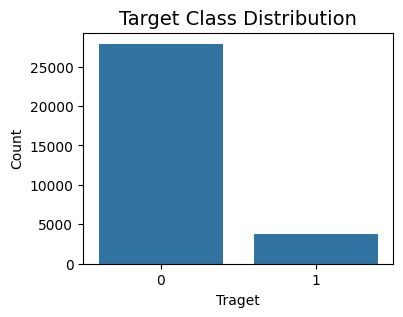

In [27]:
plt.figure(figsize=(4,3))
sns.countplot(x='Target', data=train_df)
plt.title("Target Class Distribution", fontsize=14)
plt.xlabel("Traget")
plt.ylabel("Count")
plt.show()

In [ ]:
# Findings from 01_data_understanding.ipynb:
# 1. No Missing Values
# 2. No Duplicates
# 3. Target Variable : 
#       0: 88.16% (did not subscribe)
#       1: 11.84% (subscribed)
# Strong Class Imbalance